# Лабораторная работа №2

ФИО:   Караева Анна Радионовна

Группа: БИВТ-21-1

Отправлять можно следующими способами:
1. Запушить этот ноутбук в GitHub в репозиторий, где у вас лежат ноутбуки с лабами

Deadlines:
- Занятие №6 в семестре (Занятие №2 очное)

Что необходимо сделать:  
**В общих чертах просто провести EDA** (но обычно это не бывает просто)
## Читайте задание внимательно

Исходные данные:
1. В [табличке](https://docs.google.com/spreadsheets/d/11600OkqdRzxc-xZmFTuBs099VeAqU_GlE0Bx6bBlIRE/edit?usp=sharing) необходимо узнать название своего датасета
2. Скачать нужны вам данные можно в [Google Drive](https://drive.google.com/drive/folders/1Phm-Fq1GL-VX7NS-DCEMRh_Fo1wU7DQ9?usp=sharing)
  
---
Теперь по пунктам, что я от вас жду:  
1. **Найти** в таблице (из исходных данных) название своего датасета
2. **Описать** кратко постановку задачи, что от вас хотят. Какие есть переменные. Целевое событие непрерывно (предсказываем число от -$\infty$ до $\infty$) либо дискретно (предсказываем класс из конечного множества вариантов, например 0 или 1, или какое-то число в диапазоне [0; 10])
3. Построить распределение целевой переменной в виде гистограммы, сделать промежуточные выводы (обратите внимание на однородоность распределения и возможный дисбаланс). Посчитайте количество уникальных значений целевой переменной.
4. Выведите основные статистики по переменным в датасете (для этого есть готовый метод в pandas, он считает count, min, max, mean, 25%, 50% и пр.). Это делается **одним** методом (вы его знаете).
5. Выведите основную информацию по датасету (сколько всего колонок, каких они типов, сколько в них non-null элементов). Это делается **одним** методом (вы его знаете).
6. Посчитайте количество пропусков (NaN, Null, null, None) элементов во всех колонках. Предположите, почему эти пропуски могли возникнуть, и как их можно было бы заменить.
7. Постройте гистограммы 5 любых признаков (из множества `X`, или как оно изначально у нас называется `data.data`). Если видите какое-то смещение, несимметричность и прочее, опишите это словами в ноутбуке.
8. Постройте графики зависимости 5 любых (на ваш выбор) переменных от целевой переменной (если переменных меньше, чем 5, то сделайте столько, сколько получится). Сделайте вывод, можно ли использовать эти переменные для прогнозирования целевой переменной (иначе говоря, есть ли какая-то взаимосвязь между y-переменной и X-переменной)  
9. _extra_ (необязательно). Посмотрите на зависимость двух переменных одновременно от целевой переменной. То есть по оси OX должна быть переменная $X_{n}$, по оси OY -- переменная $X_{k}$. И у вас будет две кривые (два облака точек) в разрезе целевой переменной. Либо вы можете построить похожее для категориальных признаков, но необходимо будет прочитать про heatmap.

---
P.S.  
Просьба -- делать каждое задание в отдельных ячейках и с отдельными заголовками (как пункт 1 и 2 в этом ноутбуке) типа  
- Заголовок
- Ячейки с кодом
- Другой заголовок
- Другие ячейки с кодом

## 0. Пример импорта данных

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("/content/aug_train.csv", sep=',')  # если нужно, можно поменять разделитель
data

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


## 2. Описание постановки задачи

Компания проводит оценку, сколько людей, прошедших курсы этой компании, захотят остаться рабоать в ней, а сколько захотят уйти в другую компанию. Постановка задачи включает Прогнозирование вероятности того, что кандидат начнет искать новую работу или останется работать в компании, а также интерпретация влияющих факторов на решение сотрудника. Набор данных несбалансирован. Большинство признаков являются категориальными (номинальными, порядковыми, бинарными), некоторые с высокой мощностью.  Датасет содержит следующие переменные: id_участника, город, индекс развития города, пол, соответствующий опыт, университет, уровень образования, основная дисциплина, опыт работы, размер компании, тип компании, последнее место работы, часы обучения, целевая переменная. Целевая переменная принимает значения 0 или 1, показывая, хочет ли человек поменять работу или нет.

## 3. Распределение целевой переменной

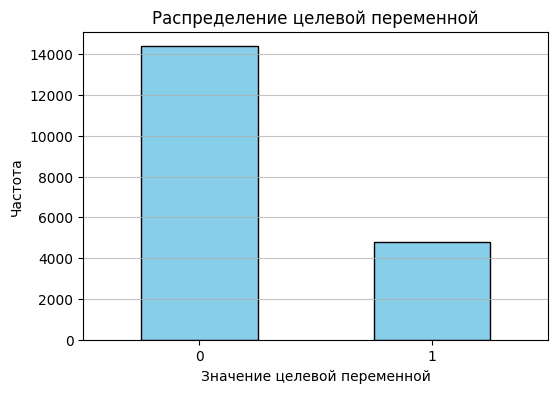

Количество уникальных значений целевой переменной: 2


In [11]:
# Построим барплот для целевой переменной
plt.figure(figsize=(6, 4))
data['target'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Распределение целевой переменной')
plt.xlabel('Значение целевой переменной')
plt.ylabel('Частота')
plt.xticks([0, 1], ['0', '1'], rotation=0)
plt.grid(axis='y', alpha=0.75)
plt.show()

# Посчитаем количество уникальных значений целевой переменной
unique_values = data['target'].nunique()
print(f"Количество уникальных значений целевой переменной: {unique_values}")

## 4. Основные статистика

In [12]:
data.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


## 5. Основная информация

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

## 6. Пропуски

In [16]:
# Подсчитаем количество пропусков в каждой колонке
missing_values = data.isnull().sum()

# Выведем количество пропусков для каждой колонки
print("Количество пропусков в каждой колонке:")
print(missing_values)


Количество пропусков в каждой колонке:
enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64


Пропуски могли возникнуть из-за того, что работники не захотели раскрывать личную информацию. Для замены пропусков можно использовать различные методы, такие как заполнение наиболее часто встречающимся значением, средним или медианой, а также методы интерполяции в зависимости от характеристик данных.

## 7. Гистограммы

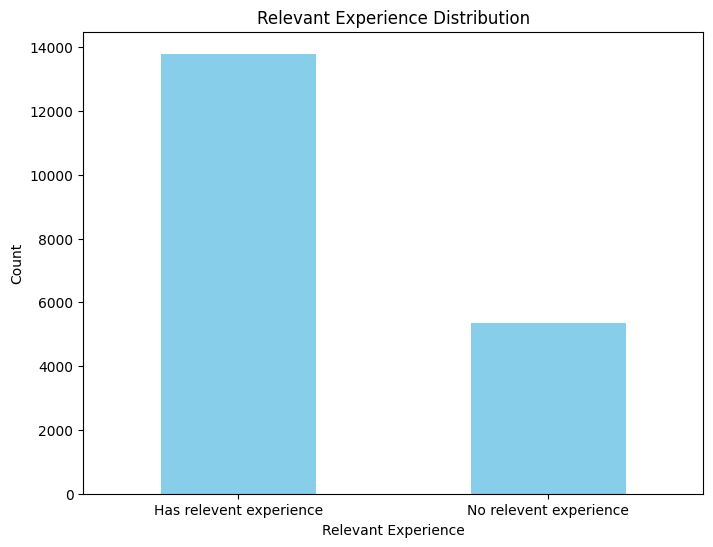

In [25]:
plt.figure(figsize=(8, 6))
data['relevent_experience'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Relevant Experience Distribution')
plt.xlabel('Relevant Experience')
plt.ylabel('Count')
plt.xticks(rotation = 0)
plt.show()

Большинство людей, прошедших курсы в компании, имею необходимый опыт, но менее трети не имеют.

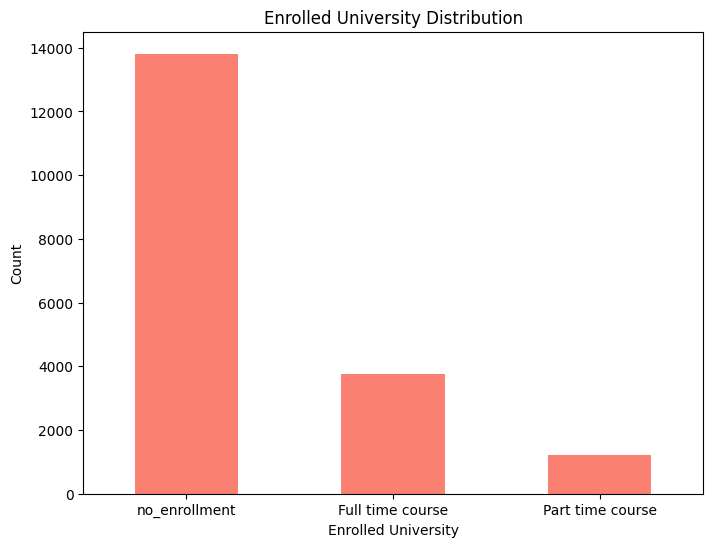

In [24]:
plt.figure(figsize=(8, 6))
data['enrolled_university'].value_counts().plot(kind='bar', color='salmon')
plt.title('Enrolled University Distribution')
plt.xlabel('Enrolled University')
plt.ylabel('Count')
plt.xticks(rotation = 0)
plt.show()

Большинство кандидатов не учатся в университете во время исследования.

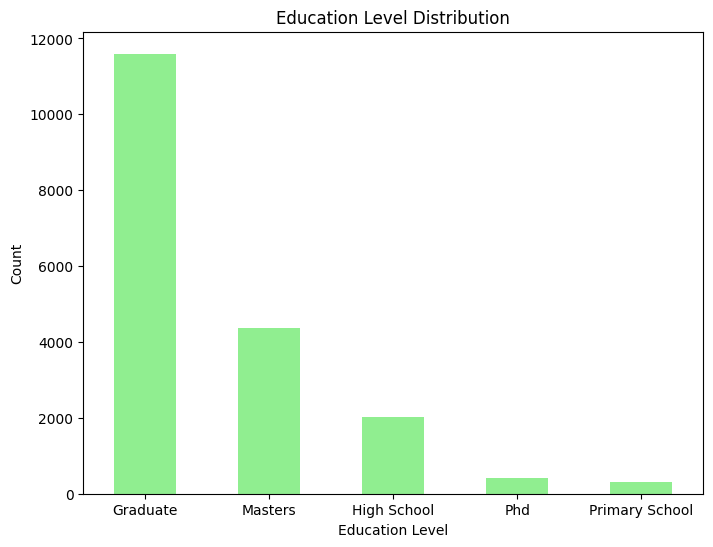

In [26]:
plt.figure(figsize=(8, 6))
data['education_level'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation = 0)
plt.show()


Большинство кандидатов получили высшее образование.

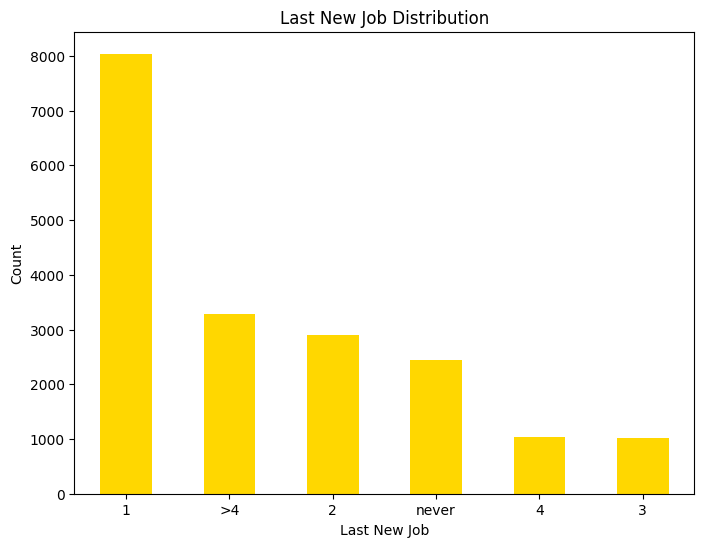

In [27]:
plt.figure(figsize=(8, 6))
data['last_new_job'].value_counts().plot(kind='bar', color='gold')
plt.title('Last New Job Distribution')
plt.xlabel('Last New Job')
plt.ylabel('Count')
plt.xticks(rotation = 0)
plt.show()

Большинство кандидатов работали в одно компании до этого.

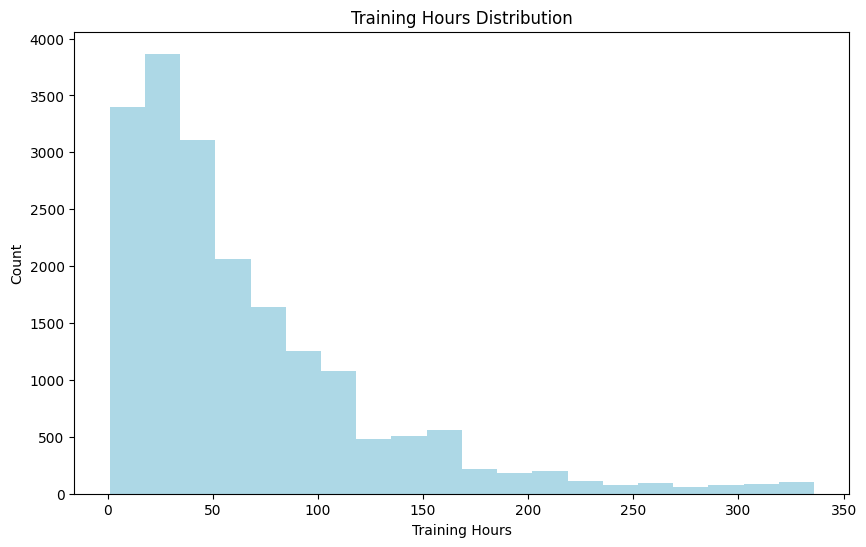

In [28]:
plt.figure(figsize=(10, 6))
plt.hist(data['training_hours'], bins=20, color='lightblue')
plt.title('Training Hours Distribution')
plt.xlabel('Training Hours')
plt.ylabel('Count')
plt.xticks(rotation = 0)
plt.show()

Большинство кандидатов обучались около 50 часов. Почти все кандидаты обучались менее 100 часов.

## 8. Графики

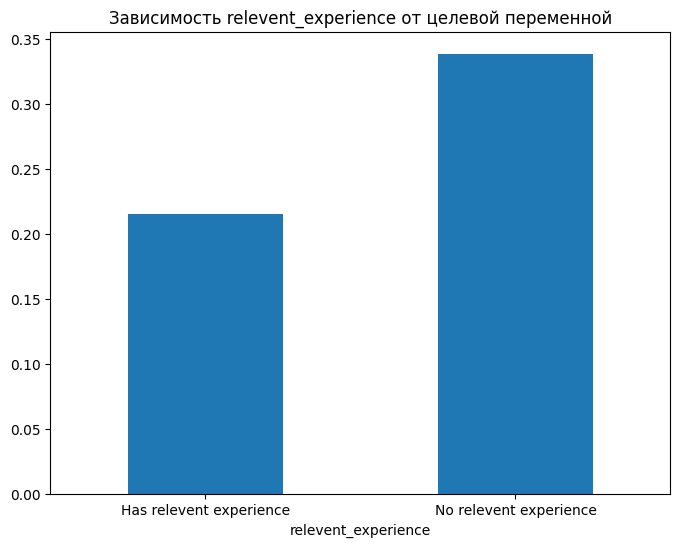

In [61]:
plt.figure(figsize=(8, 6))
a = data.groupby('relevent_experience')['target'].mean()
a.plot(kind ='bar')
plt.title('Зависимость relevent_experience от целевой переменной')
plt.xticks(rotation = 0)
plt.show()

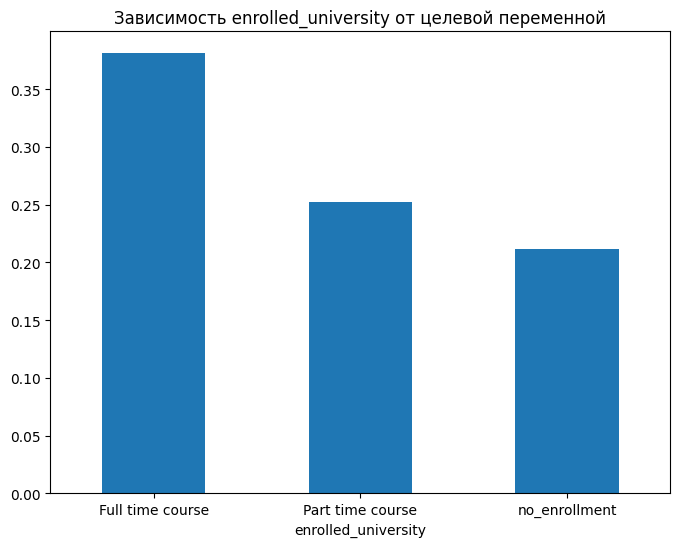

In [63]:
plt.figure(figsize=(8, 6))
a = data.groupby('enrolled_university')['target'].mean()
a.plot(kind ='bar')
plt.title('Зависимость enrolled_university от целевой переменной')
plt.xticks(rotation = 0)
plt.show()

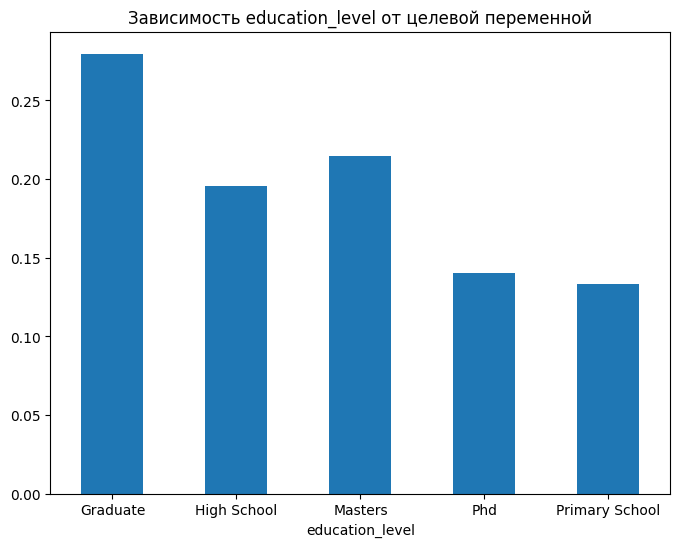

In [65]:
plt.figure(figsize=(8, 6))
a = data.groupby('education_level')['target'].mean()
a.plot(kind ='bar')
plt.title('Зависимость education_level от целевой переменной')
plt.xticks(rotation = 0)
plt.show()

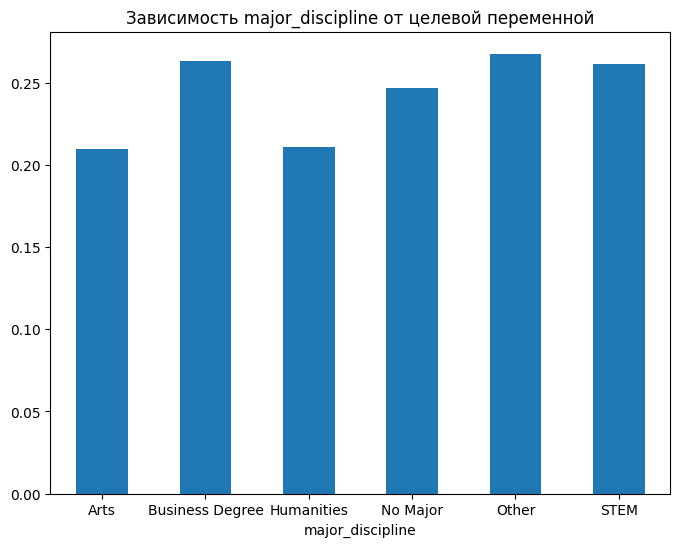

In [67]:
plt.figure(figsize=(8, 6))
a = data.groupby('major_discipline')['target'].mean()
a.plot(kind ='bar')
plt.title('Зависимость major_discipline от целевой переменной')
plt.xticks(rotation = 0)
plt.show()

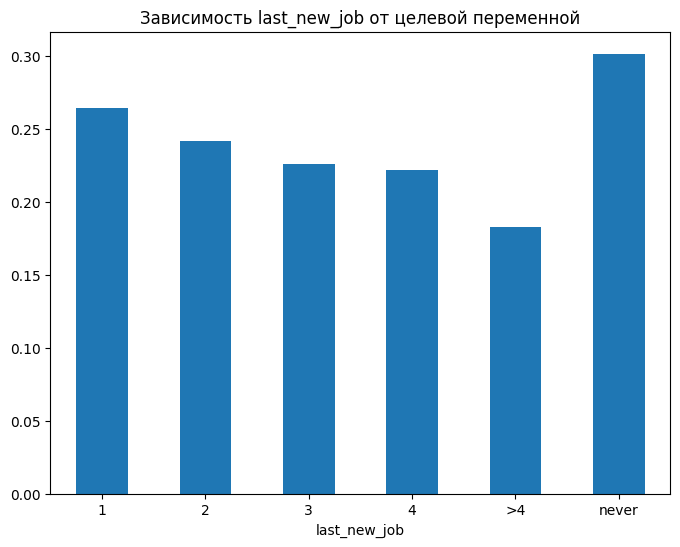

In [69]:
plt.figure(figsize=(8, 6))
a = data.groupby('last_new_job')['target'].mean()
a.plot(kind ='bar')
plt.title('Зависимость last_new_job от целевой переменной')
plt.xticks(rotation = 0)
plt.show()

Рассмотренные переменные можно использовать для прогнозирования целевой переменной, поскольку на графиках видна прямая зависимость между переменными x и y.